In [13]:
#Load data and drop Sr
import pandas as pd
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
columns=df.columns
df.head()
df.drop("Serial No.", axis=1, inplace=True)
y = df['Chance of Admit ']
df.drop("Chance of Admit ", axis=1, inplace=True)
print(df.columns)
print(df.head())




Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0


In [14]:
#Split X,Y,train Test split 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(pred)

[0.88618988 0.85975265 0.70843439 0.71286367 0.73083912 0.59731723
 0.99026212 0.95128742 0.92871525 0.97315639 0.80900007 0.70525066
 0.70007956 0.78485367 0.63786095 0.71686072 0.66490317 0.6760607
 0.53811313 0.62050799 0.5613294  0.64732831 0.8214123  0.53703724
 0.73284701 0.69044016 0.65715756 0.83165341 0.72496562 0.71826787
 0.85598142 0.67730657 0.79627918 0.70430351 0.67365726 0.70735808
 0.84605664 0.69948628 0.7142189  0.75334802 0.54980626 0.5364519
 0.58734372 0.91200525 0.88171856 0.77107307 0.58346089 0.72183174
 0.50144774 0.8027838  0.75597409 0.5754883  0.77288956 0.62322426
 0.59697481 0.66604541 0.56519912 0.71925818 0.7615729  0.59765558
 0.76891996 0.95582689 0.73809001 0.73413542 0.49791034 0.67620959
 0.88092865 0.66129781 0.93752943 0.81903708 0.72527003 0.49955278
 0.52889173 0.65049009 0.77797144 0.64052563 0.73539083 0.72149992
 0.6622225  0.68146232 0.61774682 0.61844429 0.6518382  0.71660651
 0.83131196 0.60759648 0.84373397 0.66062919 0.62863243 0.605139

In [15]:
#Regression
from sklearn import metrics
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)


0.05642461247550141


In [16]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df = sc.transform(df)
df1=pd.DataFrame(df,columns=columns[1:8])
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)
df1.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [18]:
#Again Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)



0.06322145832854785


In [20]:
#Activity 2
# Download and load the data
import pandas as pd
df = pd.read_csv("/content/Netflix_Movies_and_TV_Shows.csv")
df.head()


,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [26]:
# Drop irrelevant columns

import pandas as pd

# Load dataset
df = pd.read_csv("/content/Netflix_Movies_and_TV_Shows.csv")

# Check available columns
print(df.columns)

# Drop column safely
df.drop(columns=["Serial No."], axis=1, errors='ignore', inplace=True)

# Display dataset after dropping
df.head()



Index(['Title', 'Type', 'Genre', 'Release Year', 'Rating', 'Duration',
       'Country'],
      dtype='object')


,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [37]:
#Activity 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("Netflix_Movies_and_TV_Shows.csv")

# Remove any spaces in column names
df.columns = df.columns.str.strip()

# Drop irrelevant columns (e.g., 'Title' which is just a name)
df.drop(columns=["Title"], axis=1, inplace=True)

# Convert categorical columns into numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Choose target variable
target_column = "Release Year"  # Change if needed

if target_column not in df_encoded.columns:
    raise ValueError(f"Column '{target_column}' not found. Check dataset column names.")

# Define X (independent variables) and y (dependent variable)
X = df_encoded.drop(columns=[target_column], axis=1)
y = df_encoded[target_column]

# Display X and y shapes
print("\nFeature Matrix (X) and Target (y) Shapes:")
print(X.shape, y.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Regression Model (Before Scaling)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute RMSE before scaling
rmse_before_scaling = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE Before Scaling: {rmse_before_scaling:.4f}")

# Apply Standardization (Z-score Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Regression Model After Standardization
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Compute RMSE after Standardization
rmse_after_scaling = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f"\nRMSE After Scaling (Standardization): {rmse_after_scaling:.4f}")

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Train Regression Model After Min-Max Scaling
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)

# Predict on test set
y_pred_minmax = model_minmax.predict(X_test_minmax)

# Compute RMSE after Min-Max Scaling
rmse_after_minmax = np.sqrt(mean_squared_error(y_test, y_pred_minmax))
print(f"\nRMSE After Scaling (Min-Max): {rmse_after_minmax:.4f}")

# Compare RMSE Before and After Scaling
print("\nComparison of RMSE:")
print(f"RMSE Before Scaling: {rmse_before_scaling:.4f}")
print(f"RMSE After Standardization: {rmse_after_scaling:.4f}")
print(f"RMSE After Min-Max Scaling: {rmse_after_minmax:.4f}")



Feature Matrix (X) and Target (y) Shapes:
(3000, 144) (3000,)

RMSE Before Scaling: 22.3853

RMSE After Scaling (Standardization): 22.3853

RMSE After Scaling (Min-Max): 22.3853

Comparison of RMSE:
RMSE Before Scaling: 22.3853
RMSE After Standardization: 22.3853
RMSE After Min-Max Scaling: 22.3853


In [39]:
#Preprocessing Pipeline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the preprocessing steps
preprocessor = Pipeline([('scaler', StandardScaler())])
# Standardize the features
# Define the classifiers
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
# Build the pipelines
knn_pipeline = Pipeline([('preprocessor', preprocessor),('classifier', knn)])
decision_tree_pipeline = Pipeline([('preprocessor', preprocessor),('classifier', decision_tree)])
# Fit the pipelines
knn_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
# Make predictions
knn_predictions = knn_pipeline.predict(X_test)
decision_tree_predictions = decision_tree_pipeline.predict(X_test)





In [40]:
#Preprocessing Pipeline
# Compare the results
knn_accuracy = accuracy_score(y_test, knn_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)


K-Nearest Neighbors Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [41]:
#Activity 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing pipeline (Standard Scaling)
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Standardizing features
])

# Apply preprocessing
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train models
knn.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print results
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


KNN Accuracy: 1.00
Decision Tree Accuracy: 1.00


In [42]:
#Loading and showing the data
#KNN Implementation
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 79,99, 121]:
  print(f"index:{i}, features:{data[i]}, label:{labels[i]}")


index:0, features:[5.1 3.5 1.4 0.2], label:0
index:79, features:[5.7 2.6 3.5 1. ], label:1
index:99, features:[5.7 2.8 4.1 1.3], label:1
index:121, features:[5.6 2.8 4.9 2. ], label:2


In [44]:
# Splitting the data
indices = np.random.permutation(len(data))
n_test_samples = 12  # Number of test samples

learn_data = data[indices[:-n_test_samples]]
learn_labels = labels[indices[:-n_test_samples]]
test_data = data[indices[-n_test_samples:]]
test_labels = labels[indices[-n_test_samples:]]


In [47]:
#Splitting the data
print("The first samples of our learn set:")
print(f"{'Index':<6}{'Data':<20}{'Label'}")  # Adjust column alignment

for i in range(5):
    print(f"{i:<6}{str(learn_data[i]):<20}{learn_labels[i]}")  # Convert array to string

print("\nThe first samples of our test set:")
print(f"{'Index':<6}{'Data':<20}{'Label'}")  # Adjust column alignment

for i in range(5):
    print(f"{i:<6}{str(test_data[i]):<20}{test_labels[i]}")  # Convert array to string



The first samples of our learn set:
Index Data                Label
0     [5.6 2.5 3.9 1.1]   1
1     [5.4 3.4 1.7 0.2]   0
2     [6.  3.4 4.5 1.6]   1
3     [5.9 3.2 4.8 1.8]   1
4     [6.1 2.6 5.6 1.4]   2

The first samples of our test set:
Index Data                Label
0     [6.7 3.1 4.4 1.4]   1
1     [5.1 3.8 1.6 0.2]   0
2     [6.2 2.8 4.8 1.8]   2
3     [7.  3.2 4.7 1.4]   1
4     [6.2 2.2 4.5 1.5]   1


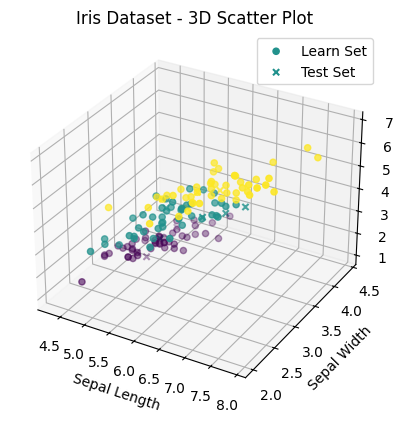

In [48]:
#Loading and Showing the data
import matplotlib.pyplot as plt

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the learn set
ax.scatter(learn_data[:, 0], learn_data[:, 1], learn_data[:, 2],
           c=learn_labels, cmap='viridis', label='Learn Set')

# Plotting the test set
ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2],
           c=test_labels, cmap='viridis', marker='x', label='Test Set')

# Set labels for each axis
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')  # Add z-axis label

# Set the title of the plot
ax.set_title('Iris Dataset - 3D Scatter Plot')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [49]:
#Calculate distance
import numpy as np

def distance(instance1, instance2):
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    return np.linalg.norm(instance1 - instance2)

# Test the function
print(distance([3, 5], [1, 1]))
print(distance(learn_data[3], learn_data[44]))


4.47213595499958
0.3605551275463989


In [50]:
#Getting Neighbours
def get_neighbors(training_set, labels, test_instance, k, distance):
    distances = []
    for train, label in zip(training_set, labels):
        dist = distance(test_instance, train)
        distances.append((train, dist, label))
    distances.sort(key=lambda x: x[1])  # Sort by distance
    return distances[:k]

for i in range(5):
    neighbors = get_neighbors(learn_data, learn_labels, test_data[i], 3, distance=distance)
    print(f"Index: {i}")
    print(f"Testset Data: {test_data[i]}")
    print(f"Testset Label: {test_labels[i]}")
    print(f"Neighbors: {neighbors}\n")


Index: 0
Testset Data: [6.7 3.1 4.4 1.4]
Testset Label: 1
Neighbors: [(array([6.6, 3. , 4.4, 1.4]), 0.14142135623730995, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3162277660168377, 1), (array([6.7, 3.1, 4.7, 1.5]), 0.31622776601683783, 1)]

Index: 1
Testset Data: [5.1 3.8 1.6 0.2]
Testset Label: 0
Neighbors: [(array([5.1, 3.8, 1.5, 0.3]), 0.14142135623730953, 0), (array([5.1, 3.7, 1.5, 0.4]), 0.24494897427831772, 0), (array([5.3, 3.7, 1.5, 0.2]), 0.24494897427831785, 0)]

Index: 2
Testset Data: [6.2 2.8 4.8 1.8]
Testset Label: 2
Neighbors: [(array([6.3, 2.7, 4.9, 1.8]), 0.17320508075688762, 2), (array([6.1, 3. , 4.9, 1.8]), 0.24494897427831838, 2), (array([6. , 3. , 4.8, 1.8]), 0.2828427124746193, 2)]

Index: 3
Testset Data: [7.  3.2 4.7 1.4]
Testset Label: 1
Neighbors: [(array([6.9, 3.1, 4.9, 1.5]), 0.26457513110645914, 1), (array([6.7, 3.1, 4.7, 1.5]), 0.3316624790355399, 1), (array([6.8, 2.8, 4.8, 1.4]), 0.45825756949558427, 1)]

Index: 4
Testset Data: [6.2 2.2 4.5 1.5]
Testset Label: 1
N

In [51]:
#Voting
from collections import Counter

def vote(neighbors):
    class_counter = Counter(neighbor[2] for neighbor in neighbors)
    return class_counter.most_common(1)[0][0]

count = 0
for i in range(n_test_samples):
    neighbors = get_neighbors(learn_data, learn_labels, test_data[i], 1, distance=distance)
    predicted_label = vote(neighbors)

    if test_labels[i] == predicted_label:
        count += 1

    print(f"Index: {i}, Result of Vote: {predicted_label}, Label: {test_labels[i]}, Data: {test_data[i]}")

accuracy = count / n_test_samples
print(f"Accuracy: {accuracy}")


Index: 0, Result of Vote: 1, Label: 1, Data: [6.7 3.1 4.4 1.4]
Index: 1, Result of Vote: 0, Label: 0, Data: [5.1 3.8 1.6 0.2]
Index: 2, Result of Vote: 2, Label: 2, Data: [6.2 2.8 4.8 1.8]
Index: 3, Result of Vote: 1, Label: 1, Data: [7.  3.2 4.7 1.4]
Index: 4, Result of Vote: 1, Label: 1, Data: [6.2 2.2 4.5 1.5]
Index: 5, Result of Vote: 2, Label: 2, Data: [5.8 2.7 5.1 1.9]
Index: 6, Result of Vote: 1, Label: 1, Data: [6.5 2.8 4.6 1.5]
Index: 7, Result of Vote: 2, Label: 2, Data: [6.4 2.8 5.6 2.1]
Index: 8, Result of Vote: 0, Label: 0, Data: [4.9 3.1 1.5 0.1]
Index: 9, Result of Vote: 0, Label: 0, Data: [5.  3.2 1.2 0.2]
Index: 10, Result of Vote: 1, Label: 1, Data: [5.6 3.  4.1 1.3]
Index: 11, Result of Vote: 2, Label: 2, Data: [6.5 3.2 5.1 2. ]
Accuracy: 1.0


Index: 0, Predicted: 2, Actual: 0, Data: [13.64  3.1   2.56]
Index: 1, Predicted: 2, Actual: 0, Data: [14.21  4.04  2.44]
Index: 2, Predicted: 2, Actual: 2, Data: [12.93  2.81  2.7 ]
Index: 3, Predicted: 0, Actual: 0, Data: [13.73  1.5   2.7 ]
Index: 4, Predicted: 1, Actual: 1, Data: [12.37  1.17  1.92]
Index: 5, Predicted: 0, Actual: 0, Data: [14.3   1.92  2.72]
Index: 6, Predicted: 1, Actual: 1, Data: [12.    3.43  2.  ]
Index: 7, Predicted: 2, Actual: 2, Data: [13.4   3.91  2.48]
Index: 8, Predicted: 1, Actual: 1, Data: [11.61  1.35  2.7 ]
Index: 9, Predicted: 2, Actual: 2, Data: [13.36  2.56  2.35]
Index: 10, Predicted: 0, Actual: 0, Data: [13.5   1.81  2.61]
Index: 11, Predicted: 2, Actual: 2, Data: [13.5   3.12  2.62]
Index: 12, Predicted: 2, Actual: 0, Data: [13.41  3.84  2.12]
Index: 13, Predicted: 2, Actual: 1, Data: [12.77  3.43  1.98]
Index: 14, Predicted: 0, Actual: 0, Data: [13.63  1.81  2.7 ]
Index: 15, Predicted: 1, Actual: 1, Data: [12.52  2.43  2.17]
Index: 16, Predict

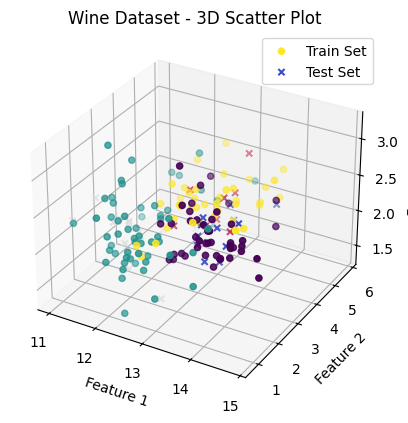

In [52]:
#Activity 4
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from collections import Counter

# Load Wine Dataset
wine = load_wine()
data, labels = wine.data, wine.target

# Select the first three dimensions for visualization
data_3d = data[:, :3]

# Split into train and test (Using built-in function)
X_train, X_test, y_train, y_test = train_test_split(data_3d, labels, test_size=0.2, random_state=42)

# Function to compute Euclidean Distance
def euclidean_distance(instance1, instance2):
    return np.linalg.norm(np.array(instance1) - np.array(instance2))

# Function to return K=5 neighbors
def get_neighbors(training_set, labels, test_instance, k):
    distances = [(train, euclidean_distance(test_instance, train), label) for train, label in zip(training_set, labels)]
    distances.sort(key=lambda x: x[1])
    return distances[:k]

# Function to perform voting and calculate accuracy
def vote(neighbors):
    class_counter = Counter(neighbor[2] for neighbor in neighbors)
    return class_counter.most_common(1)[0][0]

# Testing KNN Algorithm
correct_predictions = 0
k = 5

for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, y_train, X_test[i], k)
    predicted_label = vote(neighbors)

    if predicted_label == y_test[i]:
        correct_predictions += 1

    print(f"Index: {i}, Predicted: {predicted_label}, Actual: {y_test[i]}, Data: {X_test[i]}")

# Calculate Accuracy
accuracy = correct_predictions / len(X_test)
print(f"Accuracy: {accuracy:.2f}")

# Plot 3D visualization of Wine Dataset
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='viridis', label='Train Set')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='coolwarm', marker='x', label='Test Set')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Wine Dataset - 3D Scatter Plot')
ax.legend()
plt.show()
